In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pandas import DataFrame, read_csv
#permet de visualiser le pourcentage de NaN dans un data frame
import seaborn as sns
#Pour calculer les distances sans avoir envie de me suicider
import geopy.distance

In [3]:
#On crée le premier dataframe qui sera le fichier ticket_data.csv 
tickets = pd.read_csv("ticket_data.csv")

In [4]:
#on l'affiche pour voir si ça a bien fonctionné
tickets

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [5]:
cities = pd.read_csv("cities.csv")
stations = pd.read_csv("stations.csv")
providers = pd.read_csv("providers.csv")

## On remarque que certaines valeurs sont à "NaN" qui signifie not a number mais dans pandas ça veut surtout dire que la colonne n'a pas de valeurs ce qui rend ce résultat initullisable dans un modéle de machine learning. Solution : Ne pas considérer la colonne ou le tuple en particulier sinon trouver un moyen de remplir la case avec par exemple la moyenne de toutes les valeurs présentes (efficace ou non selon le contexte). On les visualise juste en dessous pour chaque data frame

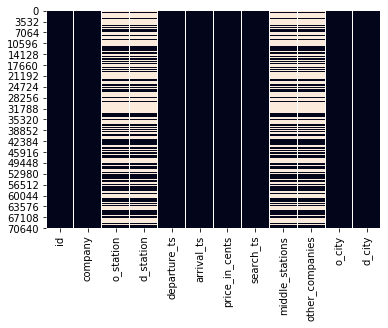

In [6]:
sns.heatmap(tickets.isnull(),cbar=False)

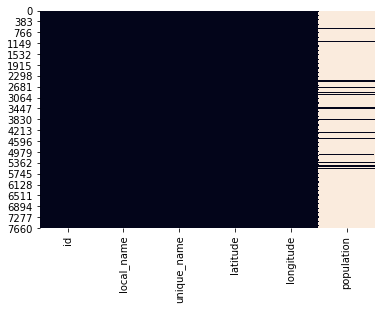

In [7]:
sns.heatmap(cities.isnull(),cbar=False)

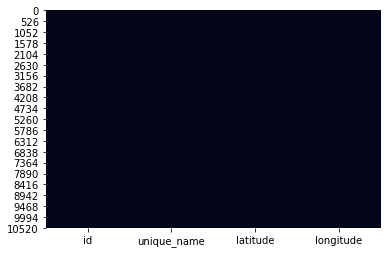

In [8]:
sns.heatmap(stations.isnull(),cbar=False)

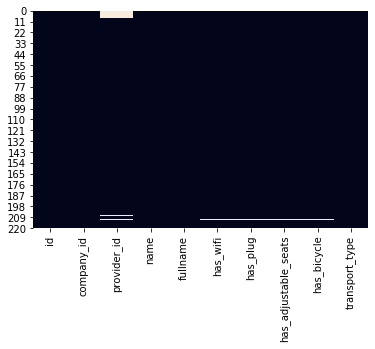

In [9]:
sns.heatmap(providers.isnull(),cbar=False)

In [10]:
# épuration des data frames en enlevant tout ce qui est NAN dans les colonnes qui serviront de jointures plus tard
tickets.dropna(subset=['o_city', 'd_city','o_station','d_station','company'])

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
49,6795074,13,767.0,396.0,2017-10-06 05:25:00+00,2017-10-06 16:40:00+00,1990,2017-10-01 01:04:12.45+00,"{932,932}",{13},628,453
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [11]:
#On peut décider de n'afficher que les 2 premiers éléments pour une lecture plus souple.
cities.head(2)

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0


In [12]:
stations.head(2)

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883


In [13]:
providers.head(2)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus


In [14]:
#Prix minimum d'un ticket
print("le prix minimum d'un ticket est : " + str(tickets['price_in_cents'].min()))
#Prix maximum
print("le prix maximum d'un ticket est : " + str(tickets['price_in_cents'].max()) + " C'est trop cher D:")
#Prix moyen
print("le prix moyen d'un ticket est : " + str(tickets['price_in_cents'].mean()) + "j'aurais pu faire un round ici mais j'en peux plus.")

le prix minimum d'un ticket est : 300
le prix maximum d'un ticket est : 38550 C'est trop cher D:
le prix moyen d'un ticket est : 4382.711061374178j'aurais pu faire un round ici mais j'en peux plus.


## Pour les durées c'est un peu plus compliqué car le format de la colonne n'est pas le bon pour pouvoir faire des soustraction dessus afin d'avoir la durée du voyage (on peut le voir dans la cellule en bas), on va donc le convertir en date.

In [15]:
tickets.dtypes

id                   int64
company              int64
o_station          float64
d_station          float64
departure_ts        object
arrival_ts          object
price_in_cents       int64
search_ts           object
middle_stations     object
other_companies     object
o_city               int64
d_city               int64
dtype: object

In [16]:
print("la durée minimum d'un voyage est : " + str((pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])).min()))

print("la durée maximum d'un voyage est : " + str((pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])).max()))

print("la durée moyenne d'un voyage est : " + str((pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])).mean()))

la durée minimum d'un voyage est : 0 days 00:20:00
la durée maximum d'un voyage est : 20 days 12:51:00
la durée moyenne d'un voyage est : 0 days 07:04:37.247600


In [17]:
#jointure entre tickets et providers
tickets.set_index('company')
providers.set_index('company_id')
df = tickets.join(providers, how = 'inner', lsuffix = '_left', rsuffix = '_right')

In [18]:
df.loc[df['transport_type'] == 'bus', 'name_match'] = print("la durée moyenne d'un voyage en bus est : " + str((pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])).mean()))

la durée moyenne d'un voyage en bus est : 0 days 07:04:37.247600


In [19]:
df.loc[df['transport_type'] == '', 'name_match'] = print("la durée moyenne d'un voyage en train est : " + str((pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])).mean()))

la durée moyenne d'un voyage en train est : 0 days 07:04:37.247600


In [20]:
#On nettoie un peu le data frame final en enlevant les colonnes qu'on n'utilise pas
#tickets.dropna(subset=['o_city', 'd_city','o_station','d_station','company'])
#df3.drop(columns = ['o_station','d_station','search_ts','id_right','has_wifi','has_plug','has_adjustable_seats'])

In [21]:
df5 = tickets.merge(providers, left_on='company', right_on='company_id')
df5

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,id_y,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,17,9,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,18,9,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,19,9,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,20,9,41,icBus,IC Bus,False,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715659,6848395,12,283.0,1595.0,2017-10-27 06:00:00+00,2017-10-27 17:45:00+00,4687,2017-10-14 19:01:07.915+00,"{561,8813}",{71},...,8389,12,NaN,idvroom,idVroom,False,False,False,False,carpooling
715660,6848396,12,283.0,1593.0,2017-10-27 06:00:00+00,2017-10-27 17:20:00+00,4777,2017-10-14 19:01:07.915+00,"{561,561}",{71},...,8389,12,NaN,idvroom,idVroom,False,False,False,False,carpooling
715661,6852979,12,523.0,86.0,2017-10-30 21:30:00+00,2017-10-31 11:45:00+00,1990,2017-10-16 08:10:00.399+00,"{458,458}",{13},...,8389,12,NaN,idvroom,idVroom,False,False,False,False,carpooling
715662,6853589,12,283.0,523.0,2017-12-22 18:30:00+00,2017-12-23 04:25:00+00,4590,2017-10-16 10:12:35.105+00,"{330,330}",{13},...,8389,12,NaN,idvroom,idVroom,False,False,False,False,carpooling


In [22]:
#Moyenne des temps de voyages par bus
arrivalBus = pd.to_datetime(df5[df5['transport_type'] == 'bus']['arrival_ts']) 
departureBus = pd.to_datetime(df5[df5['transport_type'] == 'bus']['departure_ts'])
str((arrivalBus - departureBus).mean())

'0 days 14:14:50.188535'

In [23]:
#Moyenne des temps de voyages par train
arrivalTrain = pd.to_datetime(df5[df5['transport_type'] == 'train']['arrival_ts']) 
departureTrain = pd.to_datetime(df5[df5['transport_type'] == 'train']['departure_ts'])
str((arrivalTrain - departureTrain).mean())

'0 days 12:42:13.333333'

In [24]:
#Moyenne des temps de voyages en convoiturage
arrivalConvoit = pd.to_datetime(df5[df5['transport_type'] == 'carpooling']['arrival_ts']) 
departureConvoit = pd.to_datetime(df5[df5['transport_type'] == 'carpooling']['departure_ts'])
str((arrivalConvoit - departureConvoit).mean())

'0 days 11:20:00'

In [25]:
#Moyenne des prix de tickets par bus
print(round(df5[df5['transport_type'] == 'bus']['price_in_cents'].mean(),2))
#Moyenne des prix de tickets en train
print(round(df5[df5['transport_type'] == 'train']['price_in_cents'].mean(),2))
#Moyenne des prix de tickets en convoiturage
print(round(df5[df5['transport_type'] == 'carpooling']['price_in_cents'].mean(),2))


3333.04
3265.56
3868.8


In [26]:
#Je fais 2 jointures l'une après l'autre pour retrouver les deux longitudes et les deux lattitudes.
df6 = tickets.merge(cities, left_on=['o_city'], right_on=['id'])
df7 = df6.merge(cities, left_on=['d_city'], right_on=['id'])
df7

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,unique_name_x,latitude_x,longitude_x,population_x,id,local_name_y,unique_name_y,latitude_y,longitude_y,population_y
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6841687,8385,NaN,NaN,2017-10-13 20:40:00+00,2017-10-13 22:30:00+00,1050,2017-10-12 18:56:29.547+00,NaN,NaN,...,milano,45.465422,9.185924,1324169.0,295,"Genova, Liguria, Italia",genova,44.415990,8.919045,NaN
74164,6841688,8385,NaN,NaN,2017-10-13 20:50:00+00,2017-10-13 22:30:00+00,1300,2017-10-12 18:56:29.547+00,NaN,NaN,...,milano,45.465422,9.185924,1324169.0,295,"Genova, Liguria, Italia",genova,44.415990,8.919045,NaN
74165,6841689,13,482.0,225.0,2017-10-13 19:10:00+00,2017-10-14 15:05:00+00,1580,2017-10-12 18:56:29.667+00,"{25,25}",{13},...,milano,45.465422,9.185924,1324169.0,295,"Genova, Liguria, Italia",genova,44.415990,8.919045,NaN
74166,6841690,13,482.0,225.0,2017-10-13 19:10:00+00,2017-10-13 23:50:00+00,1780,2017-10-12 18:56:29.667+00,"{25,25}",{13},...,milano,45.465422,9.185924,1324169.0,295,"Genova, Liguria, Italia",genova,44.415990,8.919045,NaN


In [27]:
#Je définis une fonction pour calculer la distance entre les deux cities en utilisant geopy
def distancescalc(row):
    row['distance_Cities'] =  geopy.distance.distance((row['longitude_x'],row['latitude_x']),(row['longitude_y'],row['latitude_y'])).km
    return row

In [ ]:
#J'applique une lambda sur ma foction sur toutes les lignes du data frame en créant une colonne pour preserver la distance entre les deux cités
df8 = df7.apply(lambda x:distancescalc(x),axis=1)

In [ ]:
#Moyenne des prix de tickets pour une distance inferieure à 200
print(round(df8[(df8['distance_Cities'] < 200)]['price_in_cents'].mean(),2))

#Moyenne des prix de tickets pour une distance entre 201-800km
print(round(df8[(df8['distance_Cities']) > 200  & (df8['distance_Cities'] < 800)]['price_in_cents'].mean(),2))

#Moyenne des prix de tickets pour une distance entre  800-2000km
print(round(df8[(df8['distance_Cities'] > 800) & (df8['distance_Cities'] < 2000)]['price_in_cents'].mean(),2))

#Moyenne des prix de tickets par pour une distance entre  2000+km
print(round(df8[df8['distance_Cities'] > 2000]['price_in_cents'].mean(),2))

print("ALED")

In [ ]:
#Moyenne des temps de voyages pour une distance inferieure à 200
arrival200 = pd.to_datetime(df8[df8['distance_Cities'] < 200]['arrival_ts']) 
departure200 = pd.to_datetime(df8[df8['distance_Cities'] < 200]['departure_ts'])
str((arrival200-departure200).mean())

In [ ]:
#Moyenne des temps de voyages pour une distance entre 201 et 800
arrival800 = pd.to_datetime(df8[(df8['distance_Cities']) > 200  & (df8['distance_Cities'] < 800)]['arrival_ts']) 
departure800 = pd.to_datetime(df8[(df8['distance_Cities']) > 200  & (df8['distance_Cities'] < 800)]['departure_ts'])
str((arrival800-departure800).mean())

In [ ]:
#Moyenne des temps de voyages pour une distance entre 800 et 2000
arrival2000 = pd.to_datetime(df8[(df8['distance_Cities']) > 800  & (df8['distance_Cities'] < 2000)]['arrival_ts']) 
departure2000 = pd.to_datetime(df8[(df8['distance_Cities']) > 800  & (df8['distance_Cities'] < 2000)]['departure_ts'])
str((arrival2000-departure2000).mean())

In [ ]:
#Moyenne des temps de voyages pour une distance inferieure à 2000
arrivalINFINITE = pd.to_datetime(df8[df8['distance_Cities'] > 2000]['arrival_ts']) 
departureINFINITE = pd.to_datetime(df8[df8['distance_Cities'] > 2000]['departure_ts'])
str((arrivalINFINITE-departureINFINITE).mean())